# EDA: Diagnosing Diabetes

In this project, you'll imagine you are a data scientist interested in exploring data that looks at how certain diagnostic factors affect the diabetes outcome of women patients.

You will use your EDA skills to help inspect, clean, and validate the data.

**Note**: This [dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database) is from the National Institute of Diabetes and Digestive and Kidney Diseases. It contains the following columns:

- `Pregnancies`: Number of times pregnant
- `Glucose`: Plasma glucose concentration per 2 hours in an oral glucose tolerance test
- `BloodPressure`: Diastolic blood pressure
- `SkinThickness`: Triceps skinfold thickness
- `Insulin`: 2-Hour serum insulin
- `BMI`: Body mass index
- `DiabetesPedigreeFunction`: Diabetes pedigree function
- `Age`: Age (years)
- `Outcome`: Class variable (0 or 1)

Let's get started!

## Initial Inspection

1. First, familiarize yourself with the dataset [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database).

   Look at each of the nine columns in the documentation.
   
   What do you expect each data type to be?

Expected data type for each column:

- `Pregnancies`: How many times the lady stay pregnant in their life, a countable variable - Variable Numerica, Discreta 
- `Glucose`: Concetracion de la glucosa, Dice que en dos horas de tolerancia, se realizo atravez de un test oral...
- `BloodPressure`: Presion Diastolica  en  mmHg (Milimetros de mercurio)
- `SkinThickness`: Espesor de la piel en el area de triceps
- `Insulin`: 2 horas de serum insulina, en unidadedades de U/ml (Uniddad / Miligramo) # Investigar mas a fondo... 26 - 07 - 2023
- `BMI`:  Indice de Masa corporal en (Peso / Kilogramo) / Altura(metros ) ** 2 
- `DiabetesPedigreeFunction`: Funcion, de diabetes pedigre... tiene en cuenta los antecedentes de diabetes en familiares y el linaje genético.
- `Age`: Edad
- `Outcome`:  Salida, Que tipo de diabetes posee. 0 - 1 

2. Next, let's load in the diabetes data to start exploring.

   Load the data in a variable called `diabetes_data` and print the first few rows.
   
   **Note**: The data is stored in a file called `diabetes.csv`.

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

#Para una mejor impresion y visualizacion sencilla de los datos usaremos tabulate
from tabulate import tabulate



# load in data
diabetes_data = pd.read_csv('diabetes.csv')

#Presentacion unicamente de los primeros valores, keys son las columnas y tableftm, es la forma de presentacion, tambien podriamos usar simple
print(tabulate(diabetes_data.head(),  headers='keys', tablefmt='psql'))

+----+---------------+-----------+-----------------+-----------------+-----------+-------+----------------------------+-------+-----------+
|    |   Pregnancies |   Glucose |   BloodPressure |   SkinThickness |   Insulin |   BMI |   DiabetesPedigreeFunction |   Age |   Outcome |
|----+---------------+-----------+-----------------+-----------------+-----------+-------+----------------------------+-------+-----------|
|  0 |             6 |       148 |              72 |              35 |         0 |  33.6 |                      0.627 |    50 |         1 |
|  1 |             1 |        85 |              66 |              29 |         0 |  26.6 |                      0.351 |    31 |         0 |
|  2 |             8 |       183 |              64 |               0 |         0 |  23.3 |                      0.672 |    32 |         1 |
|  3 |             1 |        89 |              66 |              23 |        94 |  28.1 |                      0.167 |    21 |         0 |
|  4 |             0

3. How many columns (features) does the data contain?

In [42]:
# print number of columns
#print(diabetes_data.info())

print(len(diabetes_data.columns))
#We have in total 9 columns, and 768 entrys.

9


4. How many rows (observations) does the data contain?

In [43]:
# print number of rows
# De esta manera conseguimos el numero de filas, aun que de igual manera pudimos visualizarlo en info... as entries...
print(len(diabetes_data))

#Other way to saw the rows and columns is the next:
print(f" \n  {diabetes_data.shape}" )

768
 
  (768, 9)


## Further Inspection

5. Let's inspect `diabetes_data` further.

   Do any of the columns in the data contain null (missing) values?

In [44]:
# find whether columns contain null values

# Este es un método de pandas que se utiliza para detectar valores faltantes en un DataFrame. Para cada celda del DataFrame, 
# si el valor de la celda es NaN, entonces este método devuelve True, de lo contrario, devuelve False.

#print(f'{type(diabetes_data.isnull().sum())} \n -----') # se obtiene una serie
#print(diabetes_data.isnull().sum())

print('\n')

print(diabetes_data.info()) # Hay una  gran diferencia entre usar info e info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB
None


6. If you answered no to the question above, not so fast!

   While it's technically true that none of the columns contain null values, that doesn't necessarily mean that the data isn't missing any values.
   
   When exploring data, you should always question your assumptions and try to dig deeper.
   
   To investigate further, calculate summary statistics on `diabetes_data` using the `.describe()` method.

In [45]:
# perform summary statistics
print(diabetes_data.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  768.000000                768.000000  768.000000  
mean    31.992578                  0.471876   33.240885  
std      7.884160                  0.331329   11.760232  
min      0.000000                  0.078000   21.000000  
25%     27.300000        

7. Looking at the summary statistics, do you notice anything odd about the following columns?

   - `Glucose` 
   - `BloodPressure`
   - `SkinThickness`
   - `Insulin`
   - `BMI`
   
   All of them take values with 0.00000  that actually doesnt makes sense, so that are missing values.

**Your response to question 7**:

8. Do you spot any other outliers in the data?

The maximum value of the Insulin column is 846, which is abnormally high.
The maximum value of the Pregnancies column is 17. While having 17 pregnancies is not impossible, this case might be something to look further into to determine its accuracy.

**Your response to question 8**:

9. Let's see if we can get a more accurate view of the missing values in the data.

   Use the following code to replace the instances of `0` with `NaN` in the five columns mentioned:
   
   ```py
   diabetes_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

   Los métodos de pandas para manejar los datos faltantes, como dropna() (para eliminar filas o columnas con datos faltantes) o fillna() (para reemplazar los datos faltantes con un valor específico), pueden ser aplicados de manera eficiente.
Cuando se calculan estadísticas descriptivas (media, mediana, etc.), np.nan es ignorado por defecto. Esto significa que los ceros que en realidad representan datos faltantes no influirán en estas estadísticas y potencialmente sesgarán los resultados.
Permite una mejor visualización de los datos faltantes. Al usar funciones como isnull(), los np.nan serán identificados claramente como datos faltantes.

   ```

In [46]:
# replace instances of 0 with NaN
diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)



10. Next, check for missing (null) values in all of the columns just like you did in Step 5.

    Now how many missing values are there?

In [47]:
# find whether columns contain null values after replacements are made
print(diabetes_data.isnull().sum())


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


11. Let's take a closer look at these rows to get a better idea of _why_ some data might be missing.

    Print out all the rows that contain missing (null) values.

In [55]:
# print rows with missing values
#       any(axis=1) tells it to look at rows (axis=1 means rows, while axis=0 means columns)
print(f'There is a count of {len(diabetes_data[diabetes_data.isnull().any(axis=1)])}  NULL values \n')

null_df = diabetes_data[diabetes_data.isnull().any(axis=1)]

print(tabulate(null_df,  headers='keys', tablefmt='psql'))


#print(len(null_df)) just to prove, it works counting the cuantity of Null values.

# Visualize missing values as a heatmap
#sns.heatmap(diabetes_data.isnull(), cbar=False)


There is a count of 376  NULL values 

+-----+---------------+-----------+-----------------+-----------------+-----------+-------+----------------------------+-------+-----------+
|     |   Pregnancies |   Glucose |   BloodPressure |   SkinThickness |   Insulin |   BMI |   DiabetesPedigreeFunction |   Age | Outcome   |
|-----+---------------+-----------+-----------------+-----------------+-----------+-------+----------------------------+-------+-----------|
|   0 |             6 |       148 |              72 |              35 |       nan |  33.6 |                      0.627 |    50 | 1         |
|   1 |             1 |        85 |              66 |              29 |       nan |  26.6 |                      0.351 |    31 | 0         |
|   2 |             8 |       183 |              64 |             nan |       nan |  23.3 |                      0.672 |    32 | 1         |
|   5 |             5 |       116 |              74 |             nan |       nan |  25.6 |                      0.

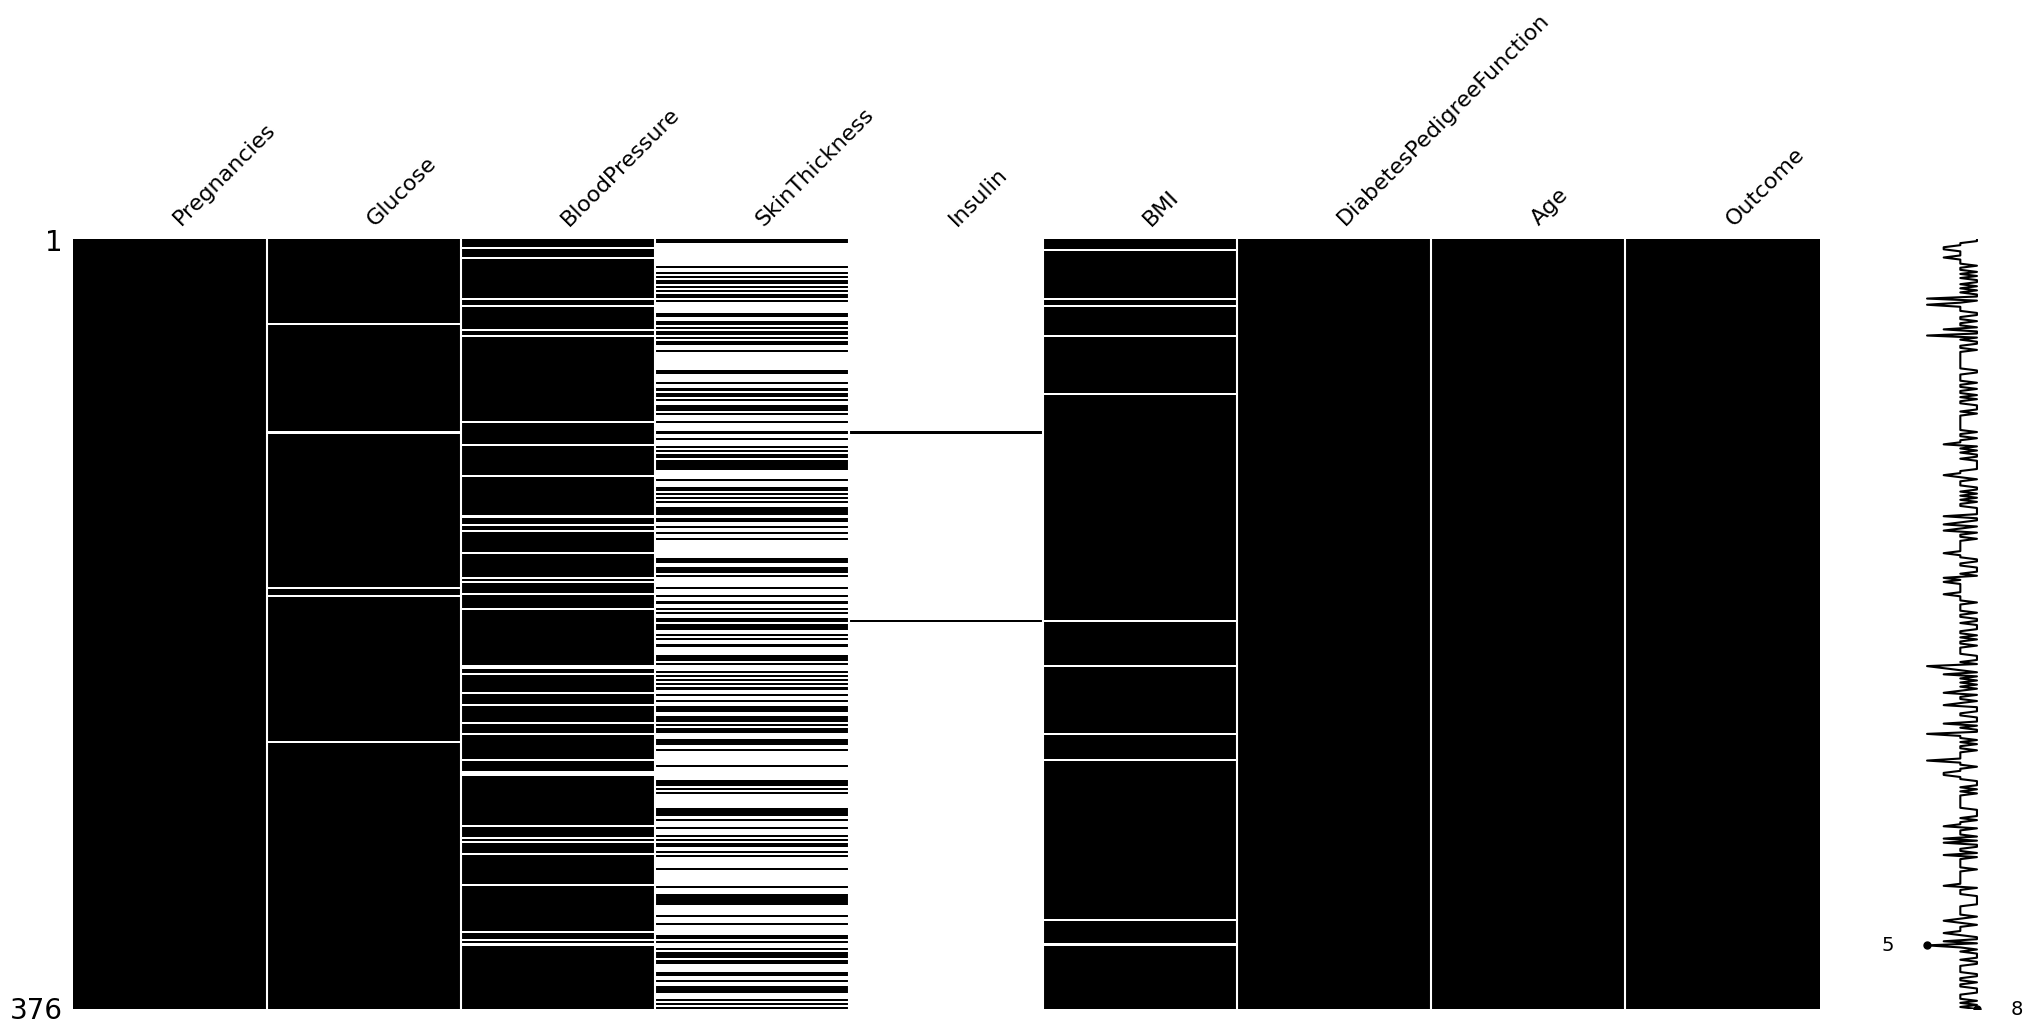

In [76]:
#Aquellos donde no se encuentra negro seran los valores faltantes
#recordemos que tenemos un total de 376 filas con valores faltantes
msno.matrix(null_df, color=(0, 0, 0))
plt.show()


#(diabetes_data.isnull().sum() / len(diabetes_data)).plot(kind='bar')
#plt.show()

12. Go through the rows with missing data. Do you notice any patterns or overlaps between the missing data?

**Your response to question 12**:

13. Next, take a closer look at the data types of each column in `diabetes_data`.

    Does the result match what you would expect?

In [92]:
# print data types using .info() method
print(diabetes_data.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int32
dtype: object


14. To figure out why the `Outcome` column is of type `object` (string) instead of type `int64`, print out the unique values in the `Outcome` column.

In [91]:
# print unique values of Outcome column
print(diabetes_data.Outcome.unique())

[1 0]


15. How might you resolve this issue?

In [90]:
diabetes_data[['Outcome']] = diabetes_data[['Outcome']].replace('O',0)
diabetes_data['Outcome'] = diabetes_data['Outcome'].fillna('0')

print(diabetes_data.Outcome.unique())

diabetes_data[['Outcome']] = diabetes_data[['Outcome']].astype(int)

['1' '0']


**Your response to question 15**:

## Next Steps:

16. Congratulations! In this project, you saw how EDA can help with the initial data inspection and cleaning process. This is an important step as it helps to keep your datasets clean and reliable.

    Here are some ways you might extend this project if you'd like:
    - Use `.value_counts()` to more fully explore the values in each column.
    - Investigate other outliers in the data that may be easily overlooked.
    - Instead of changing the `0` values in the five columns to `NaN`, try replacing the values with the median or mean of each column.